##**Linear Regression**##

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
where $a_0$ is commonly known as the *slope*, and $a_1,a_2,..$ are commonly known as the *intercept* or *weights* for the multiple features.

**About The Dataset**

Dataset Source -> [Advertisement Data](https://www.kaggle.com/ashydv/advertising-dataset/version/1#)

This Advertisement dataset(advertising.csv) contains Sales of a product in different market region, along with the advertising budgets for the product in three different media : TV, Radio and Newspaper. This dataset can be used to predict the Sales based on the advertising budget of various media using regression algorithm.

Let's Import the required dependencies and load the data

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('https://raw.githubusercontent.com/kowshiksarker/ML-Hands-On-with-Python/main/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


**Descriptive Analysis**

In [ ]:
print('Dataset contains %s data points having %s features' %(df.shape[0],df.shape[1]))

Dataset contains 200 data points having 4 features


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


**Checking for missing data points**

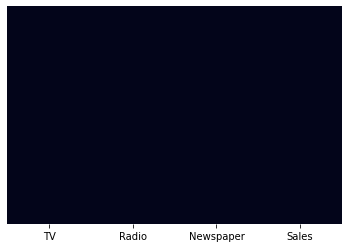

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)

In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

There is no missing values in the dataset, thus we are good to proceed.

**Outlier Analysis**

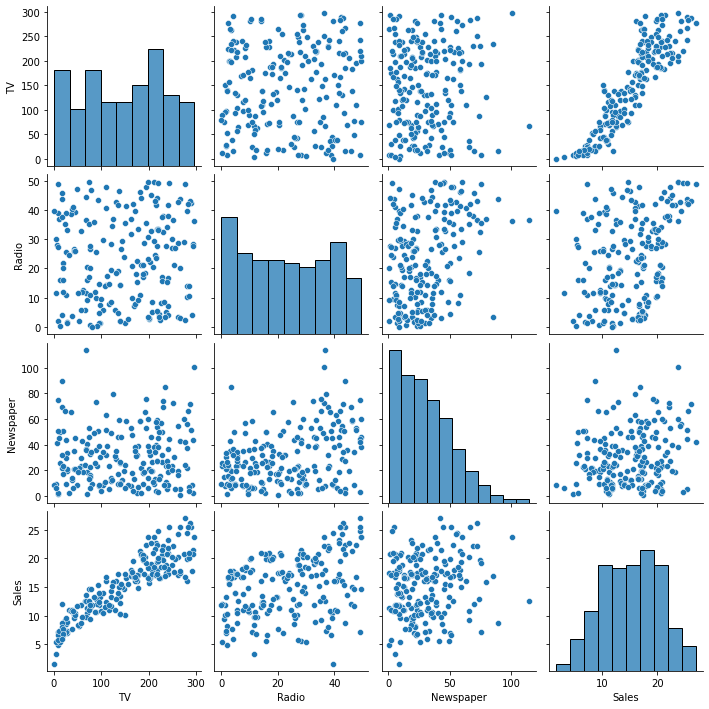

In [ ]:
sns.pairplot(df)

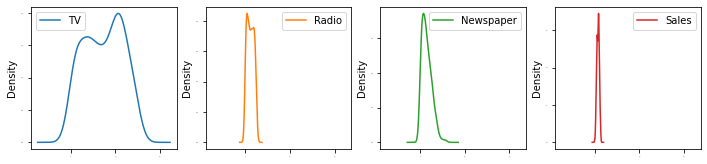

In [ ]:
# density plots
df.plot(kind='kde', subplots=True, layout=(4,4), fontsize=1, figsize=(12,12));

**Check Correlation**

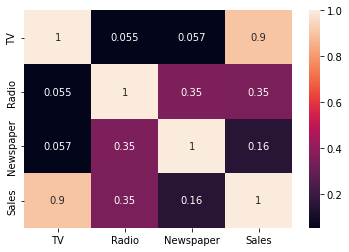

In [ ]:
sns.heatmap(df.corr(),annot=True)

We can see that there is no multicolinearity exists which tell us that our we are good to proceed with all 3 features *TV*, *Radio*, *Newspaper* to predict the *Sales*.

We will now seperate the features and the target variable and put them in different variable.

In [ ]:
X=df[["TV","Radio","Newspaper"]]
Y=df["Sales"]

Now we will split the dataset in train and test using sklearn module

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(160, 3)
(40, 3)


**Data Preprocessing**

In [ ]:
from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
normalized_train_X = normalizer.fit_transform(X_train)

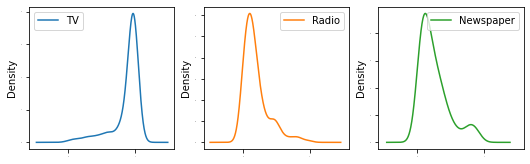

In [ ]:
pd.DataFrame(normalized_train_X,columns =["TV","Radio","Newspaper"]).plot(kind='kde', subplots=True, layout=(4,4), fontsize=1, figsize=(12,12));

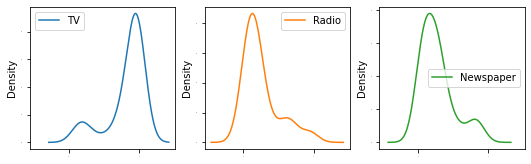

In [ ]:
normalized_test_X = normalizer.fit_transform(X_test)
pd.DataFrame(normalized_test_X,columns =["TV","Radio","Newspaper"]).plot(kind='kde', subplots=True, layout=(4,4), fontsize=1, figsize=(12,12));

**Its time to build our Linear Regression model**

In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# print the intercept,coeff and weights for each features
print(regressor.coef_)
print(regressor.intercept_)

[0.05450927 0.10094536 0.00433665]
4.714126402214127


So our linear regression equation is
$$
Sales = 5.609 + 12.311*TV + 0.238*Radio - 4.558*Newspaper
$$

In [ ]:
# print the predictions on test data
y_pred=regressor.predict(X_test)

In [ ]:
# Model Accuracy
from sklearn.metrics import mean_squared_error,r2_score
# The mean squared error
print("MSE: %.2f" % mean_squared_error(Y_test,y_pred))
print(f'RMSE: {np.sqrt(mean_squared_error(Y_test,y_pred))}')
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test,y_pred))

MSE: 2.91
RMSE: 1.7052146229349223
Coefficient of determination: 0.91


Text(0.5, 1.0, 'Actual Sales vs Predicted Sales')

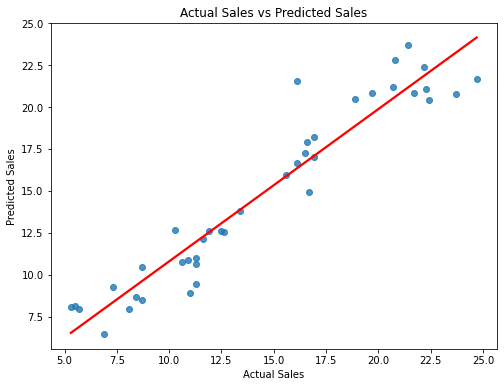

In [ ]:
# Plot outputs
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(Y_test, y_pred, line_kws={'color':'red'}, ci=None)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs Predicted Sales")

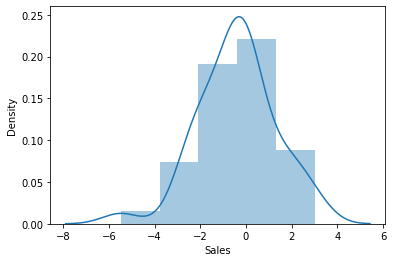

In [ ]:
residuals=(Y_test-y_pred)
sns.distplot(residuals, bins = 5)

In [ ]:
pred_table = pd.DataFrame({"Actual Value":Y_test,"Predicted Value":y_pred,"Difference":residuals})
pred_table.tail()

,Actual Value,Predicted Value,Difference
104,20.7,21.183645,-0.483645
135,11.6,12.128218,-0.528218
137,20.8,22.809533,-2.009533
164,11.9,12.609928,-0.709928
76,6.9,6.464413,0.435587


**Lets model the same using Decision Tree Algorithm Technique**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor()

In [ ]:
dtree.fit(X_train,Y_train)

DecisionTreeRegressor()

In [ ]:
# print the predictions on test data
dtree_y_pred=dtree.predict(X_test)

In [ ]:
# Model Accuracy
from sklearn.metrics import mean_squared_error,r2_score
# The mean squared error
print("MSE: %.2f" % mean_squared_error(Y_test,dtree_y_pred))
print(f'RMSE: {np.sqrt(mean_squared_error(Y_test,dtree_y_pred))}')
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test,dtree_y_pred))

MSE: 2.87
RMSE: 1.6950663703819977
Coefficient of determination: 0.91


Text(0.5, 1.0, 'Actual Sales vs Predicted Sales')

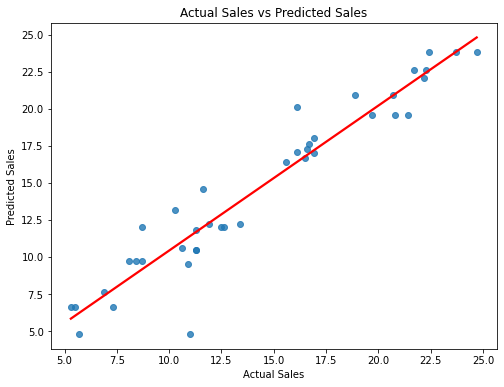

In [ ]:
# Plot outputs
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(Y_test, dtree_y_pred, line_kws={'color':'red'}, ci=None)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs Predicted Sales")

In [ ]:
residuals=(Y_test-dtree_y_pred)
dtree_pred_table = pd.DataFrame({"Actual Value":Y_test,"Predicted Value":dtree_y_pred,"Difference":residuals})
pred_table.tail()

,Actual Value,Predicted Value,Difference
104,20.7,21.183645,-0.483645
135,11.6,12.128218,-0.528218
137,20.8,22.809533,-2.009533
164,11.9,12.609928,-0.709928
76,6.9,6.464413,0.435587
